# Часть 1. Построение апроксимирующей прямой методом МНК

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Загружаем данные 
filename = 'part_1.xlsx'
data = pd.read_excel(filename)
print(data.head())

    x      y
0   0  10.20
1  10  10.05
2  20   9.95
3  22   9.94
4  30   9.92


In [21]:
# Превратим х и у в отдельные массивы
x = data['x']
y = data['y']

In [22]:
# Посчитаем коэффициенты прямой по формулам
n = len(x)
x_middle = sum(x)/n
y_middle = sum(y)/n
k = sum((x - x_middle) * (y - y_middle))/sum((x - x_middle) ** 2)
b = y_middle - k*x_middle
print(k, b)

-0.006658815665230282 9.555503209038605


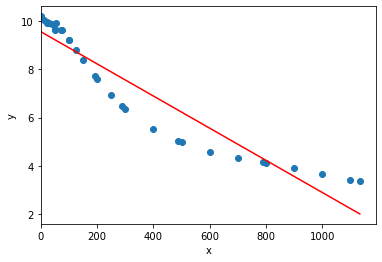

In [28]:
# Построим график
plt.scatter(x, y)
z = k*x + b
plt.plot(x, z, color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0)
plt.show()

# Часть 2. Вычисление полинома Лагранжа

In [7]:
# Загружаем данные
filename2 = 'part_2.xlsx'
data2 = pd.read_excel(filename2)
print(data2.head(10))

   Salinity  Pres
0     233.0     0
1     232.5     8
2     232.8    10
3     234.1    19
4     234.0    20
5       NaN    30
6     233.0    39
7     231.0    50
8     228.5    58
9     220.1    75


In [8]:
# Избавимся от строчек с неопределёнными значениями
data2 = data2.dropna()
data2 = data2.reset_index(drop=True)
print(data2.head(10))

   Salinity  Pres
0     233.0     0
1     232.5     8
2     232.8    10
3     234.1    19
4     234.0    20
5     233.0    39
6     231.0    50
7     228.5    58
8     220.1    75
9     218.6    78


In [9]:
# Превратим х и у в отдельные массивы
pr = data2['Pres']
sl = data2['Salinity']

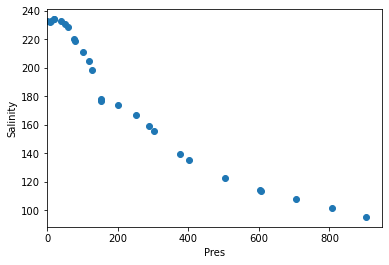

In [10]:
# Отобразим исходные точки на плоскости
plt.scatter(pr, sl)
plt.xlabel('Pres')
plt.ylabel('Salinity')
plt.xlim(0)
plt.show()

In [24]:
# Воспользуемся методом Лагранжа, предварительно построив полиномы Лагранжа
pr_new = np.linspace(pr.min(), pr.max(), 60)
q = len(pr)
m = len(pr_new)
sl_new = np.zeros(m)

for n in range(m):
    s = 0
    for i in range(q):
        p = 1
        for j in range(q):
            if i != j:
                p *= (pr_new[n] - pr[j]) / (pr[i] - pr[j])
        s += sl[i] * p
    sl_new[n] = s

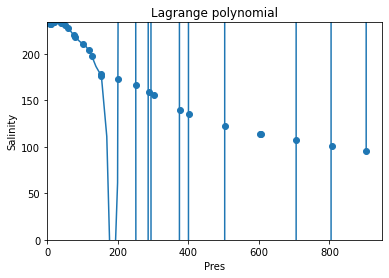

In [33]:
# Строим график
plt.scatter(pr, sl)
plt.plot(pr_new, sl_new)
plt.title('Lagrange polynomial')
plt.xlabel('Pres')
plt.ylabel('Salinity')
plt.xlim(0)
plt.ylim(0, sl.max())
plt.show()